<div class="alert alert-info">
<h1><center><font color=darkblue>Imbalance Data<font></center></h1>


</div>

        An imbalanced dataset occurs when the distribution of classes in a classification problem is skewed. One class significantly outnumbers the other(s), leading to challenges in training machine learning models, as they may become biased towards the majority class.

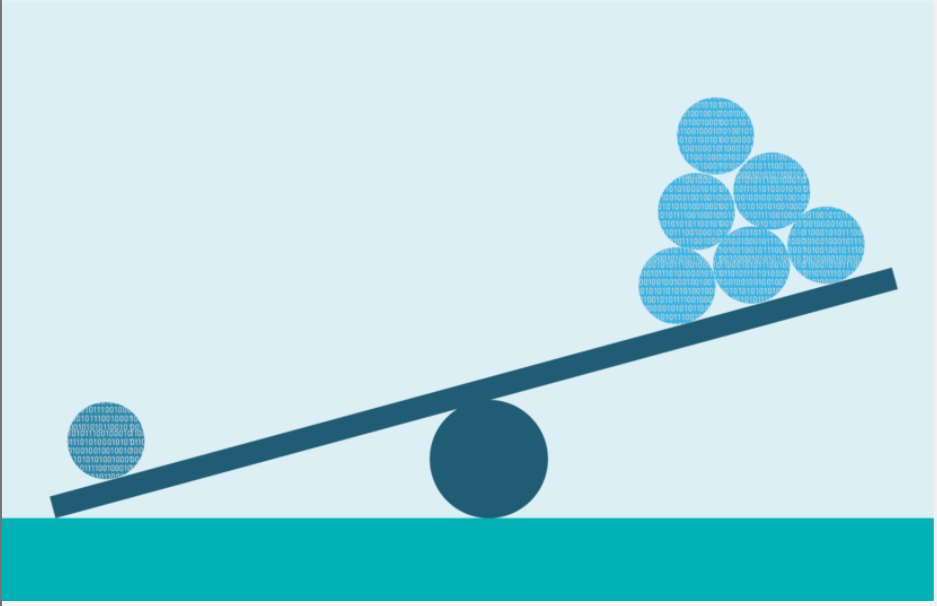

In [3]:
from PIL import Image
Image.open('Imbalance.png')

## <font color='DarkBlue'>Characteristics of Imbalanced Datasets<font>

#### * Skewed Class Ratios:
        One or More classes have significantly more samples than the others.
#### * Examples :
            * Fraud detection : Fraudulent transactions (minority) vs.legitimate ones (majority).
            * Medical diagnostics : Diseased cases (minority) vs.healthy cases (majority)

## <font color='darkblue'>Challenges of Imbalanced Datasets<font>
#### 1.Model Bias:

        1.Models tend to favor the majority class because it dominates the training process.
        2.This can lead to poor performance on the minority class.
#### 2.Misleading Metrics:

        1.Accuracy may not be a good metric for imbalanced datasets. For example:
        2.A dataset with 95% samples from one class and 5% from another might result in 95% accuracy by always predicting the majority class, but the minority class is never correctly classified.
#### 3.Poor Generalization:

        1.Models may fail to generalize minority class patterns due to insufficient representation

## <font color='darkblue'>Techniques to Handle Imbalanced Datasets<font>

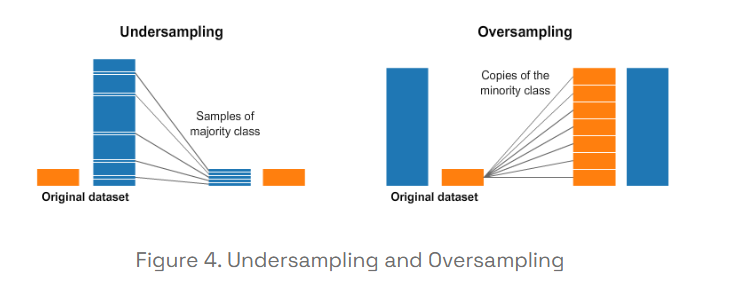

In [14]:

Image.open('Imbalance2.png')

## <font color='green'>Resampling Techniques<font>

## <font color='DarkBlue'>1.OverSampling<font>

        Increase the number of samples in the minority class by duplicating them or generating synthetic samples.(e.g., SMOTE-synthetic Minority OverSampling Technique).

### <font color='darkpink'>SMOTE<font>

        SMOTE (Synthetic Minority Oversampling Technique) is a popular method used to handle imbalanced datasets. It generates synthetic examples for the minority class to help balance the dataset. When using decision trees with imbalanced data, incorporating SMOTE can improve the model's ability to learn patterns related to the minority class, leading to better performance metrics such as recall and F1-score.

## <font color='green'>How SMOTE Works:<font>
#### 1.Synthetic Example Generation: 
        SMOTE creates synthetic data points by selecting a random data point from the minority class and finding its nearest neighbors. It then interpolates new samples between these data points.
### 2.Balancing the Dataset: 
        By creating synthetic examples, SMOTE helps to balance the dataset by increasing the representation of the minority class.


## <font color='green'>Using SMOTE with Decision Trees:<font>
#### Preprocessing Stage:
Apply SMOTE to the training dataset to create a balanced set with a higher number of minority class instances.
Train a decision tree model on this balanced data.
#### Implementation Steps:
Use libraries like imblearn for SMOTE and scikit-learn for decision trees.
Split the data into training and test sets.
Apply SMOTE only to the training set to prevent data leakage.
## <font color='darkblue'>Code Example:<font>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [6]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<Axes: ylabel='Count'>

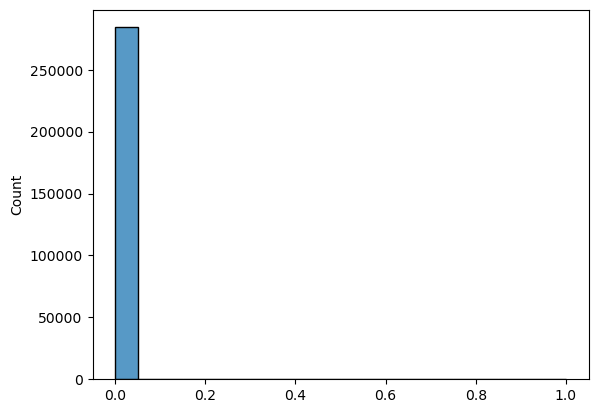

In [10]:
sns.histplot(Y)

In [7]:
# Sample dataset(X:features,Y:  Target)
#Split into to the training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [8]:
# Apply SMOTE to the training set
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


<Axes: ylabel='Count'>

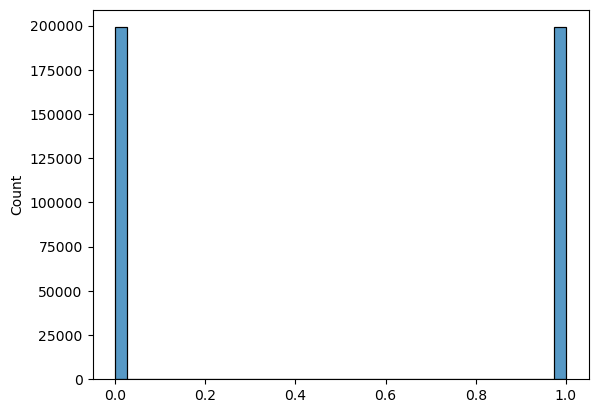

In [9]:
sns.histplot(y_train_resampled)

In [11]:
X_train.shape

(199364, 30)

In [12]:
X_train_resampled.shape

(398016, 30)

In [13]:
Y.shape

(284807,)

In [14]:
y_train_resampled.shape

(398016,)

In [15]:
# Train a decision tree on the resampled training data
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(random_state=42)

In [16]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [19]:
accuracy_score(y_test,y_pred)

0.9975305174209707

In [18]:
# Evaluate the model
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.37      0.82      0.51       136

    accuracy                           1.00     85443
   macro avg       0.69      0.91      0.76     85443
weighted avg       1.00      1.00      1.00     85443



## <font color='green'> Benfits of Using SMOTE with Decision TreeS:<font>

#### 1. Improved Recall : 
        Helps the model identify minority class instances more effectively.
#### 2.Better F1-Score : 
        Balances precision and recall ,leading to a more robust model.

## <font color='green'>Potential Drawbacks:<font>
#### 1.Overfitting: 
        The synthetic data created by SMOTE can sometimes lead to overfitting, especially if the synthetic examples are too similar to the original data.
#### 2.Computational Cost: 
        Generating synthetic data can add computational overhead.
        
        In practice, it is essential to use cross-validation and hyperparameter tuning to ensure that applying SMOTE and training a decision tree leads to a balanced model that generalizes well to unseen data.


## <font color='darkblue'>UnderSampling<font>

        Undersampling is a technique used to handle imbalanced datasets by reducing the number of samples in the majority class to balance the dataset. This method focuses on creating a more equal class distribution by randomly or strategically removing majority class samples.

## <font color='green'>Types of Undersampling<font>
### 1. Random Undersampling:
        Randomly remove samples from the majority class to match the size of the minority class.
### Advantage: 
        Simple and quick.
### Disadvantage: 
        Can lead to loss of valuable information and underrepresentation of the majority class.

## <font color='blue'>2. Cluster-Based Undersampling:<font>
        1.Use clustering techniques (e.g., K-Means) to group majority class samples and select representative samples from each cluster.
#### Advantage: 
        Retains diversity in the majority class.
#### Disadvantage: 
        More computationally expensive.

## <font color='blue'>3. NearMiss:<font>
        1.Selects majority samples based on their distance to minority samples:
            1.NearMiss-1: Retains majority samples closest to minority samples.
            2.NearMiss-2: Retains majority samples farthest from other majority samples.
            3.NearMiss-3: Retains majority samples closest to the three nearest minority samples.
## <font color='blue'>4. Tomek Links:<font>
        Removes overlapping majority samples that are closest to minority samples to reduce noise.
## <font color='blue'>5. Edited Nearest Neighbors (ENN):<font>
        Removes majority samples that do not agree with their k-nearest neighbors, improving class separation.

In [20]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()
X_res,Y_res=nm.fit_resample(X_train,y_train)

<Axes: ylabel='Count'>

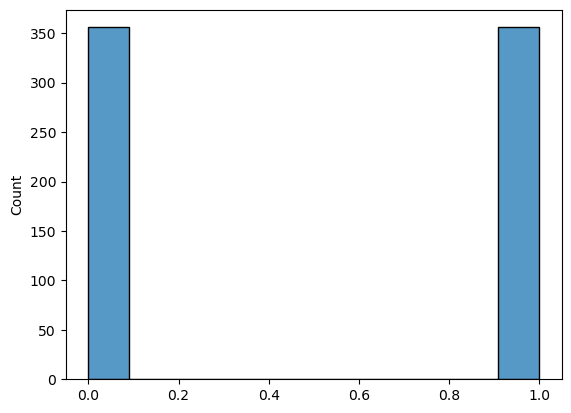

In [21]:
sns.histplot(Y_res)

In [22]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

<Axes: ylabel='Count'>

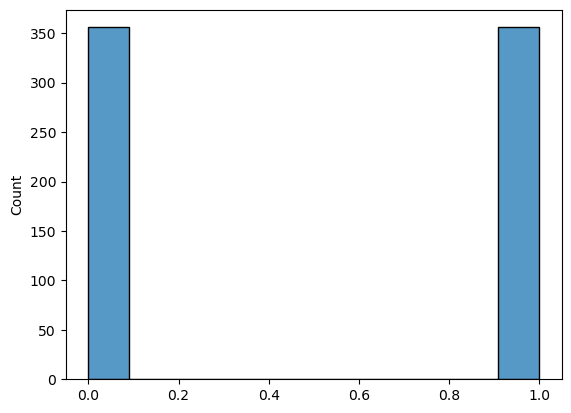

In [23]:
sns.histplot(y_resampled)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)



RandomForestClassifier(random_state=42)

In [25]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.06      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443



## <font color='blue'>Advantages of Undersampling<font>
####        1.Simple and Effective: 
        Reduces imbalance quickly.
####        2.Less Computational Cost: 
        Works with smaller datasets, making training faster.
####        3.Useful for Large Datasets: 
        Ideal when the majority class dominates with an excessive number of samples

## <font color='blue'>Disadvantages of Undersampling>font>
#### 1.Loss of Information:
        Removing samples from the majority class may lead to loss of critical patterns.
#### 2.Overfitting Risk:
        A smaller dataset increases the likelihood of overfitting.
#### 3.Bias in Majority Class:
        May lead to poor representation of the majority class.

## <font color='blue'>When to Use Undersampling<font>
        1.When the dataset is large, and reducing the majority class does not result in significant information loss.
        2.In applications where the minority class is critical (e.g., fraud detection, disease diagnosis), and you need to focus on improving its prediction.

# <font color='Darkblue'> Random State:<font>

        In simple terms, a random state is like a "seed" for random number generation. It ensures that the random processes in your code always produce the same results each time you run it.

## <font color='green'>Why is a Random State Useful?<font>
#### Reproducibility: 
        When you set a random state, others (or even yourself) can run the code later and get the same results, which is important for consistency and debugging.
#### Controlled randomness: 
        While you still get randomness in your data split, shuffling, or random sampling, using the same random state means the randomness is consistent each time.
#### Example in Context:
        Imagine splitting a dataset into training and test sets. Without setting a random state, the split could be different each time you run your code. This can lead to varying results and make it hard to compare runs. By setting a random state, the split is always the same.


In [ ]:
from sklearn.model_selection import train_test_split # Setting random_state for reproducibility 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

        In this example, random_state=42 makes sure that the way the data is split between X_train and X_test will be the same every time you run the code. The number 42 itself is arbitrary; you can use any integer.

        If you set random_state=5, the random processes will still be consistent and reproducible, but the way the data is shuffled or split will be different compared to using another number like 42.


## <font color='blue'>Key Points:<font>
        
        The number you choose as the random_state (e.g., 5, 42, or 0) serves as the seed for the random number generator.
        As long as you use random_state=5, your code will always produce the same split, shuffle, or random behavior every time you run it.
        If you change the random_state to another number, the split or shuffling will change accordingly, but it will still be consistent for that new number.
   #### Example:
        # Using random_state=5 for reproducible splits X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) 
        In this case, random_state=5 ensures that the data is split the same way every time you run this code with that specific seed, but it will result in a different split compared to random_state=42 or any other number.
